In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
def load_data():
    train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
    test_df  = pd.read_csv('/kaggle/input/titanic/test.csv')
    return train_df, test_df


In [4]:
def basic_eda(df):
    print(df.info())
    print(df.describe())
    print(df.isna().sum())


In [5]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df, is_train=True):
    df = df.copy()

    # Age
    df['Age'] = df['Age'].fillna(round(df['Age'].mean()))

    # Embarked
    if is_train:
        df = df.dropna(subset=['Embarked'])
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # Drop columns
    df.drop(columns=['Cabin', 'Name', 'Parch'], inplace=True)

    # Sex
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    # Ticket encoding
    le = LabelEncoder()
    df['Ticket'] = le.fit_transform(df['Ticket'])

    return df


In [6]:
def plot_correlation(df):
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap")
    plt.show()


In [7]:
def prepare_train_data(df):
    df = df.drop(columns=['PassengerId', 'Embarked'])
    X = df.drop(columns=['Survived'])
    y = df['Survived']
    return X, y


In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [9]:
def train_models(X, y):
    models = {
        "DecisionTree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42),
        "LogisticRegression": LogisticRegression(max_iter=500)
    }

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5)
        print(f"{name} CV Accuracy: {scores.mean():.4f}")

    return models


In [10]:
import xgboost as xgb

def train_final_model(X, y):
    model = xgb.XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
    model.fit(X, y)
    return model


In [11]:
def prepare_test_data(test_df):
    test_df = test_df.drop(columns=['PassengerId', 'Embarked'])
    return test_df


In [12]:
def create_submission(test_df, predictions):
    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predictions.astype(int)
    })
    submission.to_csv("submission.csv", index=False)
    print("submission.csv created ✔")


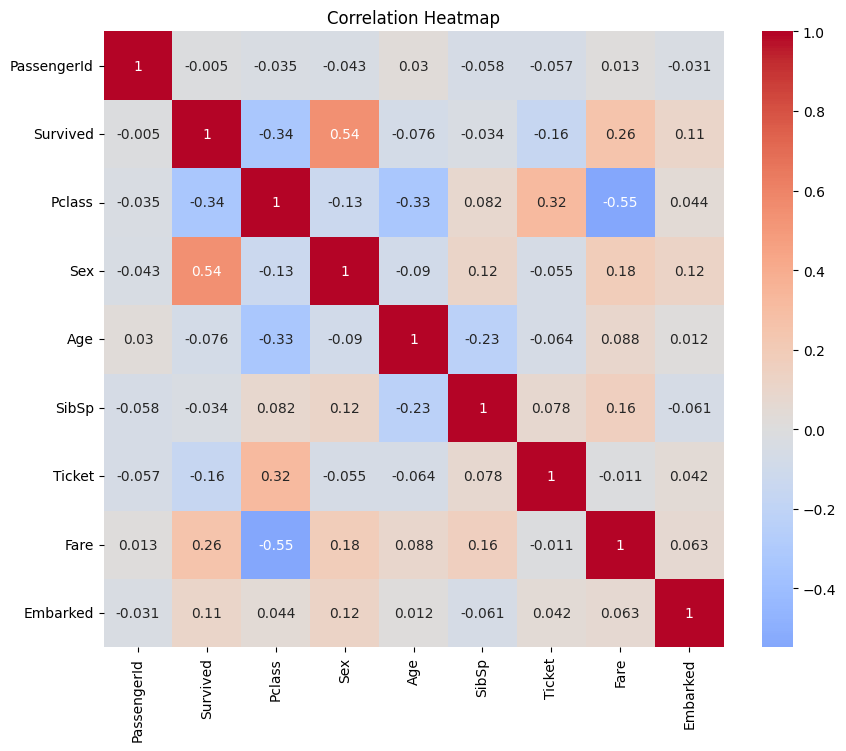

DecisionTree CV Accuracy: 0.8088
RandomForest CV Accuracy: 0.8178
GradientBoosting CV Accuracy: 0.8336
LogisticRegression CV Accuracy: 0.7953
submission.csv created ✔


In [16]:
def main():
    train_df, test_df = load_data()

    train_df = preprocess_data(train_df, is_train=True)
    test_df  = preprocess_data(test_df, is_train=False)

    plot_correlation(train_df)

    X, y = prepare_train_data(train_df)

    train_models(X, y)

    final_model = train_final_model(X, y)

    test_features = prepare_test_data(test_df)
    test_preds = final_model.predict(test_features)

    create_submission(test_df, test_preds)

main()
